<h1> Import Libraries </h1>

In [18]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nbimporter
from Fit import GradientDescent

<h1> Make Dataframe </h1>

In [19]:
#Make dataframe
cars = pd.read_csv("/Users/grantpoulsen/Desktop/Car details v3.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<h1> Clean and Normalize Data for Algorithm </h1>

In [20]:
#Do a quick clean on what we need & Normalize data for algorithm
cars['km_driven'] = cars['km_driven'] * 0.621371 / 10000
cars['selling_price'] = cars['selling_price'] / 100000
cars.rename(columns={'km_driven': 'miles_driven'}, inplace=True)

<h1> Consider the Inner Quartile for Corolla </h1>

In [87]:
#Lets get the meat of the data & use a common car model
q2 = cars['selling_price'].describe()['25%']
q3 = cars['selling_price'].describe()['75%']

cars = cars[(cars['selling_price'] <= q3) & (cars['selling_price'] >= q2)]
cars = cars[cars['name'].str.contains('Corolla')]

<h1> Plot Price vs Miles </h1>

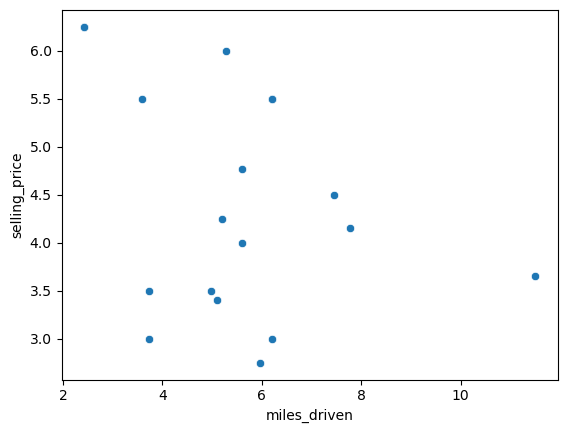

In [88]:
#Linear Negative Relationship Here
sns.scatterplot(data = cars, x = 'miles_driven', y = 'selling_price')
plt.show()

<h1> Compute Model and Gradient </h1>

In [89]:
def model(weights,miles):
    
    price = weights[0] * miles + weights[1]
    
    return price

In [90]:
def gradient(weights,data):

    gradient = np.array([0,0])

    gradient[0] = 2*(weights[0] * data[0] + weights[1] - data[1]) * (data[0])
    gradient[1] = 2*(weights[0] * data[0] + weights[1] - data[1])

    return gradient

<h1> Use Gradient Descent & Unormalize </h1>

In [91]:
data = cars[['selling_price','miles_driven']]
data = data.to_numpy().astype('long')

parameterGuess = np.array([-.25,6])
parameterTrue = GradientDescent(gradient,data,parameterGuess,.001,10000)

print(parameterTrue)

Converged on iteration: 1
[-0.25072222  6.00005556]


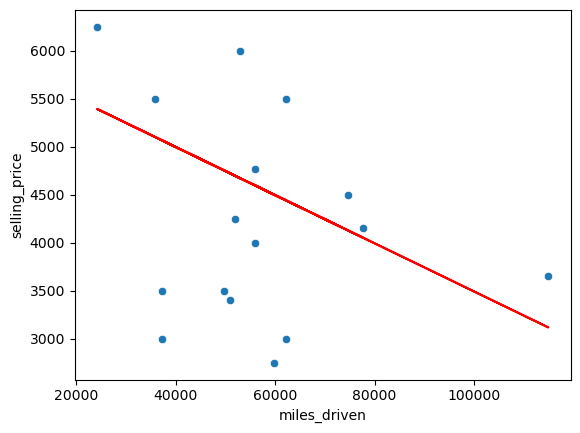

In [92]:
#Get Predicted vs Line
x = cars['miles_driven']
y = model(parameterTrue,x)

#Unnomralize
x = x * 10000
y = y * 1000
cars['miles_driven'] = cars['miles_driven'] * 10000
cars['selling_price'] = cars['selling_price'] * 1000

#Plot
plt.plot(x,y,'r')
sns.scatterplot(data = cars, x = 'miles_driven', y = 'selling_price')
plt.show()


<h1> Compute R Squared </h1>

In [80]:
yhat = cars['selling_price']

correlation_matrix = np.corrcoef(y, yhat)
correlation = correlation_matrix[0,1]
r_squared = correlation**2

print(r_squared)

0.10919217935040046
